In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("train.tsv",sep="\t")

In [3]:
df.shape

(156060, 4)

In [4]:
df.head()

,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,A series of escapades demonstrating the adage ...,1
1,2,1,A series of escapades demonstrating the adage ...,2
2,3,1,A series,2
3,4,1,A,2
4,5,1,series,2


In [5]:
df['sentiment_label']=df.Sentiment.map({0:"negative",1:"somewhat negative",2:"neutral",3:"somewhat postive",
                 4:"positive"})

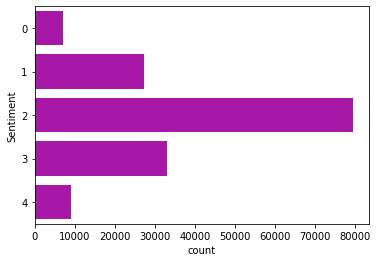

In [6]:
sns.countplot(y=df.Sentiment,color="m");

In [7]:
df['sentiment_label'].value_counts()

neutral              79582
somewhat postive     32927
somewhat negative    27273
positive              9206
negative              7072
Name: sentiment_label, dtype: int64

In [8]:
df.isna().sum()

PhraseId           0
SentenceId         0
Phrase             0
Sentiment          0
sentiment_label    0
dtype: int64

In [9]:
df.Phrase= df.Phrase.str.replace("'s"," ") 

In [10]:
df.Phrase= df.Phrase.str.replace("n't"," ")

### Wordcloud

In [11]:
from wordcloud import WordCloud, STOPWORDS

In [12]:
stopwords= set(STOPWORDS)

**negative comments**

In [13]:
df.Phrase[df.Sentiment==0].shape # negative comments

(7072,)

In [14]:
negative= ' '.join(df.Phrase[df.Sentiment==0]) # join all comments together

In [15]:
wc= WordCloud(background_color='white',max_words=200, stopwords=STOPWORDS,
             width=1600, height=800)
wc.generate(negative)

(-0.5, 1599.5, 799.5, -0.5)

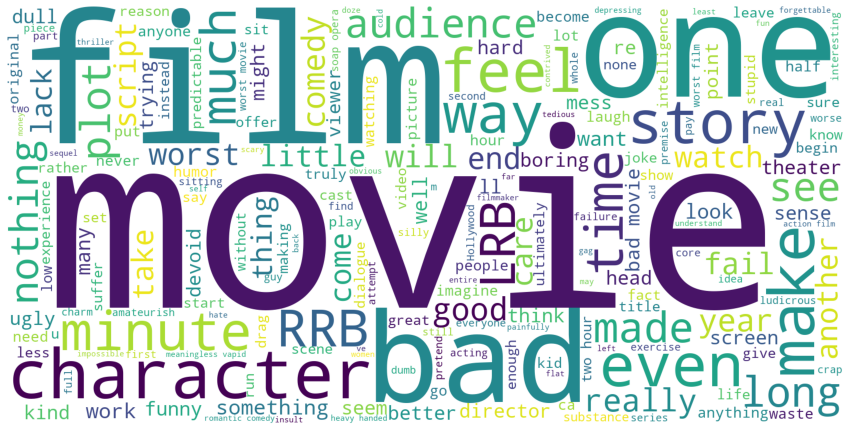

In [16]:
plt.figure(figsize=(15,10))
plt.imshow(wc,interpolation=None)
plt.axis('off')

In [17]:
negative_words= (pd.DataFrame(wc.words_,index=range(0,1))).T

In [18]:
negative_words.head(20)
#bad,rrb, lrb, long, 

,0
movie,1.000000
film,0.689382
one,0.435816
bad,0.412044
character,0.283677
make,0.242472
even,0.220285
story,0.220285
feel,0.210777
way,0.187005


**positive comments**

In [19]:
df.Phrase[df.Sentiment==4].shape

(9206,)

In [20]:
positive= ' '.join(df.Phrase[df.Sentiment==4])

In [21]:
wc= WordCloud(background_color='white',max_words=200, stopwords=STOPWORDS,
             width=1600, height=800)
wc.generate(positive)

(-0.5, 1599.5, 799.5, -0.5)

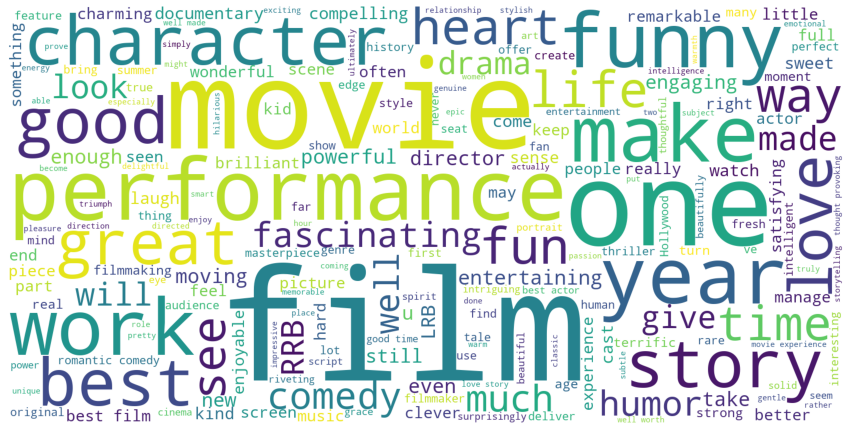

In [22]:
plt.figure(figsize=(15,10))
plt.imshow(wc,interpolation=None)
plt.axis('off')

In [23]:
positive_words= (pd.DataFrame(wc.words_,index=range(0,1))).T

In [24]:
positive_words.head(20)

,0
film,1.000000
movie,0.611111
one,0.539683
performance,0.273243
year,0.236961
make,0.233560
work,0.231293
funny,0.215420
character,0.173469
story,0.162132


In [35]:
df['length']= df.Phrase.str.split().apply(lambda x: len(x)) # count by words

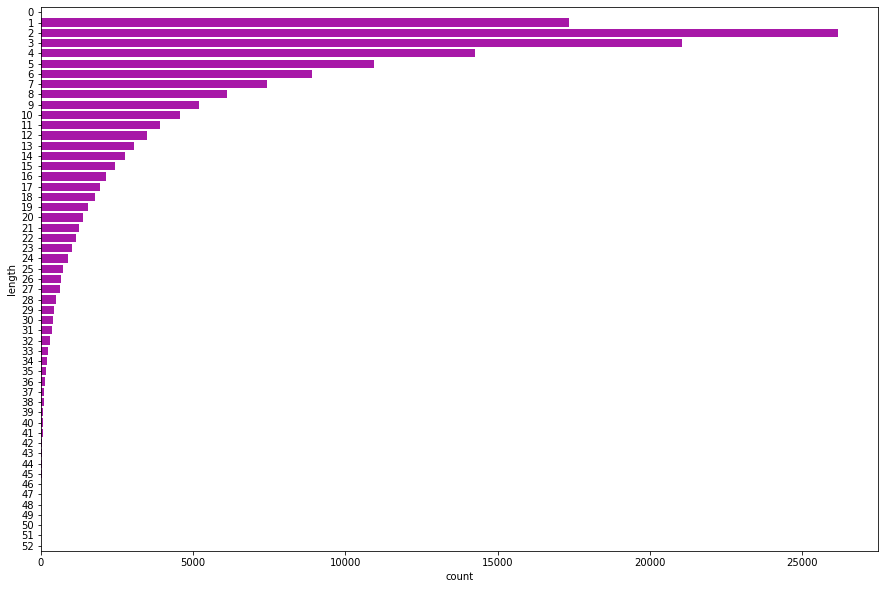

In [46]:
plt.figure(figsize=(15,10))
sns.countplot(y= df.length,color="m");

**CountVectorizer for Negative comments**

In [52]:
from sklearn.feature_extraction.text import CountVectorizer

In [53]:
cv= CountVectorizer(ngram_range=(1, 1),stop_words='english')

In [54]:
cv_transform= cv.fit_transform(df.Phrase[df.Sentiment==0])

In [55]:
cv_transform=cv_transform.toarray()

In [57]:
cv_transform.shape

(7072, 6628)

In [58]:
cv_transform= pd.DataFrame(cv_transform,columns=cv.get_feature_names())

In [60]:
cv_transform.sum().reset_index().sort_values(0,ascending=False).head(20)
# bad, comedy, worst, dul, long,rrb,lrb
# results seems to be more meaningfull than Wordclouds

,index,0
3774,movie,793
2214,film,480
442,bad,450
3359,like,332
3190,just,216
1074,comedy,174
902,characters,167
3673,minutes,163
5955,time,153
5597,story,153


**TF-IDF**

In [61]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [62]:
tf_idf= TfidfVectorizer(stop_words='english')

In [63]:
tf_idf_transform= tf_idf.fit_transform(df.Phrase[df.Sentiment==0])

In [64]:
tf_idf_transform=tf_idf_transform.toarray()

In [65]:
tf_idf_transform= pd.DataFrame(tf_idf_transform,columns=tf_idf.get_feature_names())

In [66]:
tf_idf_transform.sum().reset_index().sort_values(0,ascending=False).head(20)
#bad, worst, dull, comedy, long, boring, stupid,action

,index,0
3774,movie,177.040188
442,bad,146.126374
2214,film,109.390727
3359,like,75.323387
3190,just,65.397308
6571,worst,58.841299
1770,dull,49.149913
1074,comedy,46.982940
5955,time,44.153170
5597,story,43.882053
